In [1]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt

import matplotlib.cbook as cbook
import matplotlib.image as image

In [2]:
ff1.Cache.enable_cache('cache') 

year = int(input('Año: '))
wknd = int(input('Round: '))
print('Session type')
print('R - Race')
print('Q - Qualifying')
print('SQ - Sprint Qualifying')
print('FP1 - Practice 1')
print('FP2 - Practice 2')
print('FP3 - Practice 3')
ses = input('Session :')
firstp = input('Piloto 1: ')
secondp = input('Piloto 2: ')

Año: 2022
Round: 14
Session type
R - Race
Q - Qualifying
SQ - Sprint Qualifying
FP1 - Practice 1
FP2 - Practice 2
FP3 - Practice 3
Session :FP2
Piloto 1: VER
Piloto 2: LEC


In [3]:
plotting.setup_mpl()

session = ff1.get_session(year, wknd, ses)
session.load()

core           INFO 	Loading data for Belgian Grand Prix - Practice 2 [v2.2.8]
api            INFO 	Using cached data for driver_info
core        WARNING 	Failed to load data from Ergast API! (This is expected for recent sessions)
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '5', '4', '3', '63', '77']


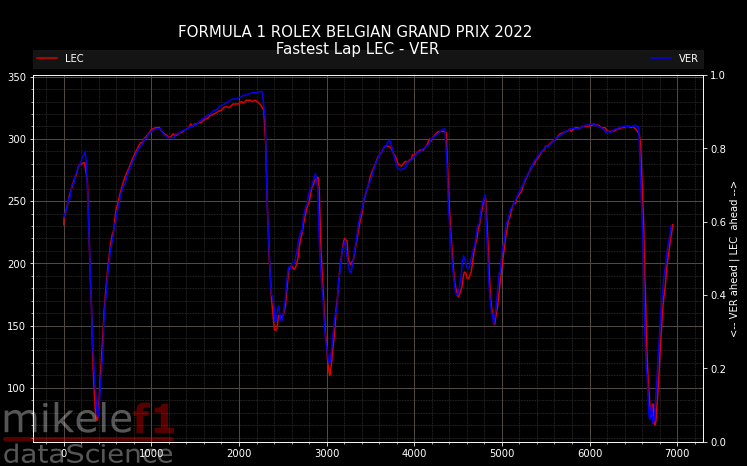

In [4]:
# We create a plot with title and adjust some setting to make it look good.
#Imagen para la marca de agua
with cbook.get_sample_data('/Users/rubenrodriguez/Documents/anaconda/fastf1/images/logog.png') as file:
    im = image.imread(file)

#Modo oscuro
plt.style.use('dark_background')

fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))

plt.rcParams['figure.figsize'] = [13, 13]

pil1 = session.laps.pick_driver(firstp).pick_fastest()
pil2 = session.laps.pick_driver(secondp).pick_fastest()

delta_time, ref_tel, compare_tel = utils.delta_time(pil2, pil1)
# ham is reference, lec is compared

#fig, ax = plt.subplots()
# use telemetry returned by .delta_time for best accuracy,
# this ensure the same applied interpolation and resampling
ax.plot(ref_tel['Distance'], ref_tel['Speed'],
        color=plotting.team_color(pil2['Team']), label=secondp)
ax.plot(compare_tel['Distance'], compare_tel['Speed'],
        color=plotting.team_color(pil1['Team']), label=firstp)

twin = ax.twinx()
# twin.plot(ref_tel['Distance'], delta_time, '--', color='white')
twin.set_ylabel(f"<-- {firstp} ahead | {secondp}  ahead -->")

plt.suptitle(f"\n{session.event['OfficialEventName']} \n Fastest Lap {secondp} - {firstp} \n"
             , size=15, y=1.02)

ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right',
           ncol=3, mode="expand", borderaxespad=0.)

fig.figimage(im, 3, 3, zorder=13, alpha=.35)


nombrearchivo = str(year)+'-'+str(wknd)+'-FLC'+ses+'-'+firstp+'-'+secondp+'.png'
plt.savefig(nombrearchivo)
plt.show()